<h3>Mise en Graphique à partir des 3 indicateurs sélectionnées.</h3>
<p>L'objectif est de mettre en relation les <u><b>3 indicateurs</b> sélectionnées</u> <br \>
    précédemment pour mettre en évidence et sélectionner les pays à plus fort potentiels.</p>


<p><u>Rappel des indicateurs sélectionnés</u> :</p>
<ol>
    <li>Indicateur de taux de connectivité à internet : '<b>IT.NET.USER.P2</b>'</li>
    <li>Indicateur de richesse / pays :'<b>NY.GDP.PCAP.CD</b>'
        <ul>
            <li>Représente le PIB / Pays / Habitant</li>
        </ul>
    </li>
    <li>Indicateur de population étudiante : '<b>popTotalEtudiant</b>'
        <ul>
            <li>colonne issue du calcul '<b>UIS.E.3</b>' + '<b>SE.TER.ENRL</b>'
                <ul>
                    <li>'<b>UIS.E.3</b>' correspond au nombre d'inscriptions dans<br \> 
                        l'enseignement secondaire supérieur, pour les deux sexes.</li>
                    <li>'<b>SE.TER.ENRL</b>' correspond au nombre d'inscriptions<br \> 
                        dans l'enseignement supérieur, tous programmes confondus, pour les deux sexes.</li>
                </ul>
            </li>
        </ul>
    </li>
</ol>

<p><u>Avant de commencer</u> :</p>
<p>
    <ol>
        <li>Importation des librairies nécessaires</li>        
        <li>Modification des paramètres par défaut de <i>Jupyter</i></li>
        <li>Importation du <i>DataFrame</i> '<b>dataPastBackup</b>' via <i>Pickle</i></li>
        <li>Importation du <i>DataFrame</i> '<b>dataPivotPopBackup</b>'  via <i>Pickle</i></li>
        <li>Importation des valeurs minimales retenues pour les 2 indices sélectionnés
            <ul><li>'<b>NY.GDP.PCAP.CD</b>'</li><li>'<b>popTotalEtudiant</b>'</li></ul></li>
    </ol>
</p>
<p><i><u>Note</u> : Je n'importe pas la <i>Serie</i> '<b>listePaysITBackup</b>' contenant<br \> les <u><b>108</b> pays candidats</u> sélectionnés à partir de l'indicateur <br \>de connectivité à 
    Internet '<b>IT.NET.USER.P2</b>' car cette série est <br \>déjà importée dans 
    le <i>DataFrame</i> '<b>dataPivotPopBackup</b>'</i></p>

In [1]:
# Import des librairies Numpy et Pandas
import numpy as np
import pandas as pd
# Import des librairies Matplotlib et Seaborn
# pour la génération des graphiques
import matplotlib.pyplot as plt
import seaborn as sns
# Import de Pickle pour la restauration des objets Python.
import pickle

In [2]:
# Modification des paramètres de Pandas pour 
# pouvoir afficher plus de lignes et plus de colonnes.
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns",100)

In [3]:
# Import du DF 'dataPastBackup', préparé précédemment, via Pickle dans le DF 'data'.
data = pickle.load(open('dataPastBackup', 'rb'))
data.tail()

,Country Name,Region,Indicator Code,Topic,Année Dernière Valeur Non Null,Dernière Valeur Non Null
886613,Zimbabwe,Sub-Saharan Africa,SL.UEM.TOTL.ZS,Social Protection & Labor: Unemployment,2016.0,5.20000
886922,Zimbabwe,Sub-Saharan Africa,UIS.LPP.AG15T24,Literacy,2014.0,35.88710
886923,Zimbabwe,Sub-Saharan Africa,UIS.LP.AG15T24,NaN,2014.0,311114.00000
886926,Zimbabwe,Sub-Saharan Africa,SE.ADT.1524.LT.ZS,Literacy,2014.0,90.42812
886928,Zimbabwe,Sub-Saharan Africa,SE.ADT.1524.LT.FM.ZS,Literacy,2014.0,1.06389


<p>Import du DF '<b>dataPivotPopBackup</b>', préparé précédemment, via <i>Pickle</i> dans le DF '<b>dataPivotPop</b>'.</p>

In [4]:
dataPivotPop = pickle.load(open('dataPivotPopBackup', 'rb'))
dataPivotPop.head()

Indicator Code,Country Name,popTotalEtudiant
22,China,87076616.0
101,United States,31268043.0
16,Brazil,18235058.0
97,Turkey,11058509.0
82,Russian Federation,9415420.0


<p>Importation des valeurs minimales retenues pour les 2 indices séléctionnés : '<b>NY.GDP.PCAP.CD</b>' et '<b>popTotalEtudiant</b>'</p>

In [5]:
indiceGDPMin = pickle.load(open('indiceGDPMinBackup', 'rb'))
indicePopMin = pickle.load(open('indicePopMinBackup', 'rb'))
print('indiceGDPMin = {}\n\
indicePopMin = {}'.format(indiceGDPMin,indicePopMin))

indiceGDPMin = 17000
indicePopMin = 500000


<h4>Data Cleaning du DF 'data'</h4>
<p>
    <ol>
        <li><u>Filtrage des '<b>Indicator Code</b>'</u> retenus, dans le DF '<b>data</b>':
            <ul><li>'<b>IT.NET.USER.P2</b>'</li><li>'<b>NY.GDP.PCAP.CD</b>'</li></ul></li>
        <li><u>Suppression des colonnes inutiles</u>:
            <ul><li>'<b>Topic</b>'</li><li>'<b>Année Dernière Valeur Non Null</b>'</li></ul></li>
    </ol>
</p>

<p>Filtrage du DF '<b>data</b>' avec les 2 '<i>Indicator Code</i>': '<b>IT.NET.USER.P2</b>' et '<b>NY.GDP.PCAP.CD</b>'

In [6]:
data = data[data['Indicator Code'].isin(['IT.NET.USER.P2','NY.GDP.PCAP.CD'])]

<p>Suppression des colonnes inutiles :</p>

In [7]:
data.drop(columns=['Topic','Année Dernière Valeur Non Null'], inplace=True)

<h4>Feature Modeling du DF 'data':</h4>
<p>
    <ol>
        <li>Passage du DF '<b>data</b>' en <i>table de pivot</i> via la création d'un nouveau DF '<b>dataPivot</b>'</li>
        <li>Merge des deux tables de pivot '<b>dataPivot</b>' et '<b>dataPivotPop</b>'
            <ul><li>Sauvegarde du DF '<b>dataPivot</b>' pour utilisation ultérieur <br \>
                lors de l'analyse prochaine sur les indicateurs de projection.</li></ul></li>
        <li>Filtrage des indices du DF '<b>dataPivot</b>' avec <br \>
            les valeurs <u>importées des analyses précédentes</u></li>
    </ol>
</p>

<p>Passage du DF '<b>data</b>' en <i>table de pivot</i> via le nouveau DF '<b>dataPivot</b>'</p>

In [8]:
dataPivot = data.pivot_table('Dernière Valeur Non Null', index=['Country Name','Region'], columns='Indicator Code').reset_index()

<p>Merge des deux tables de pivot '<b>dataPivot</b>' et '<b>dataPivotPop</b>'</p>

In [9]:
dataPivot = dataPivot.merge(dataPivotPop, how='right', left_on='Country Name', right_on='Country Name')
print('Le DF \'dataPivot\' contient bien la liste des {} pays candidats :'.format(len(dataPivot)))
dataPivot

Le DF 'dataPivot' contient bien la liste des 106 pays candidats :


Indicator Code,Country Name,Region,IT.NET.USER.P2,NY.GDP.PCAP.CD,popTotalEtudiant
0,Albania,Europe & Central Asia,66.363445,4124.982390,3.124640e+05
1,Andorra,Europe & Central Asia,97.930637,36988.622030,1.789000e+03
2,Antigua and Barbuda,Latin America & Caribbean,73.000000,14462.176279,4.407000e+03
3,Argentina,Latin America & Caribbean,70.150764,12440.320982,4.592150e+06
4,Armenia,Europe & Central Asia,62.000000,3614.688357,2.110500e+05
5,Aruba,Latin America & Caribbean,93.542454,25324.720362,6.007000e+03
6,Australia,East Asia & Pacific,88.238658,49927.819509,2.557683e+06
7,Austria,Europe & Central Asia,84.323331,44676.345835,7.891593e+05
8,Azerbaijan,Europe & Central Asia,78.200000,3876.936433,5.767930e+05
9,"Bahamas, The",Latin America & Caribbean,80.000000,28785.477671,2.066800e+04


<p>Sauvegarde du DF '<b>dataPivot</b>'</p>

In [10]:
pickle.dump(dataPivot, open('dataPivotBackup', 'wb'))

<p>Filtrage des indices du DF '<b>dataPivot</b>' avec <br \>
            les valeurs <u>importées des analyses précédentes</u></p>

In [11]:
dataPivot = dataPivot[(dataPivot['NY.GDP.PCAP.CD'] > indiceGDPMin) & 
                      (dataPivot['popTotalEtudiant'] > indicePopMin)]
print(len(dataPivot))

25


<p>Il reste <b>25 pays candidats</b></p>

<p><u>Visualisation du DF '<b>dataPivot</b>'</u> classé en <u>ordre décroissant</u> selon l'indice '<b>popTotalEtudiant</b>':</p>

In [12]:
dataPivot.sort_values(by='popTotalEtudiant', ascending=False).reset_index()

Indicator Code,index,Country Name,Region,IT.NET.USER.P2,NY.GDP.PCAP.CD,popTotalEtudiant
0,101,United States,North America,76.176737,57638.159088,3.126804e+07
1,48,Japan,East Asia & Pacific,92.000000,38900.569306,7.545380e+06
2,100,United Kingdom,Europe & Central Asia,94.775801,40341.408246,6.548014e+06
3,37,Germany,Europe & Central Asia,89.647101,42069.597987,5.557733e+06
4,51,"Korea, Rep.",East Asia & Pacific,92.716545,27538.806128,5.171956e+06
5,34,France,Europe & Central Asia,85.622200,36854.968280,4.987237e+06
6,47,Italy,Europe & Central Asia,61.324253,30674.836069,4.606917e+06
7,90,Spain,Europe & Central Asia,80.561333,26639.740588,3.626504e+06
8,83,Saudi Arabia,Middle East & North Africa,73.750904,20028.648207,3.206382e+06
9,19,Canada,North America,89.840000,42157.927991,2.743554e+06


<h4>Data Visualisation</h4>
<p>Mise en graphique des <u><b>3</b> indicateurs retenus</u> avec les <u><b>25</b> pays candidats</u></p>
<p>
    <ol>
        <li><u>1 graphique pairplot classé par couleur selon les régions</u>
            <ul><li>Affiche une grille d'axes telle que chaque indicateur sera <br \>
                partagée sur l'axe y sur une seule ligne et sur l'axe x <br \>
                sur une seule colonne.</li>
                <li>Les axes diagonaux affichent la distribution univariée <br \>
                des données pour chaque indicateur.</li></ul></li>
        <li><u>1 graphique relplot représentant la connectivité à Internet <br \>
            de chaque pays en fonction de leur PIB/Habitant</u>
            <ul><li>La population étudiante de chaque pays est représentée <br \>
                en grosseur de point.</li>
                <li>La couleur de chaque point représente sa '<b>Region</b>'</li></ul></li>
        <li><u>4 graphiques relplot (1 graphique par région)</u>
            <ul><li>Chaque graphique représente, par Région, <br \>la connectivité à Internet de chaque pays<br \>
                en fonction de leur PIB/Habitant.</li><li>La population étudiante de chaque pays est représentée <br \>
                en grosseur de point.</li>
                <li>Les axes des graphiques sont uniformisés entre eux</li></ul></li>
    </ol>
</p>

<h4>graphique pairplot classé par couleur selon les régions</h4>

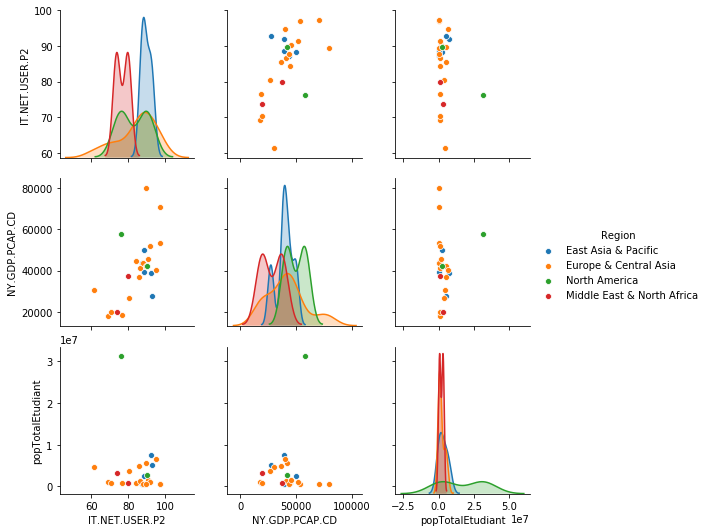

In [13]:
sns.pairplot(dataPivot, hue="Region")

<p>L'association des indicateurs '<b>IT.NET.USER.P2</b>' et '<b>NY.GDP.PCAP.CD</b>' <br \>
    permet de <u>séparer les pays en 2 groupes</u> dont l'un regroupant des <br \>
    pays <u>fortements connectés à internet</u> et ayant un <u>PIB/Habitant élevé</u>.</p>

<h4>graphique relplot représentant l'ensemble des pays candidats</h4>

Text(0.5, 1.0, 'Monde')

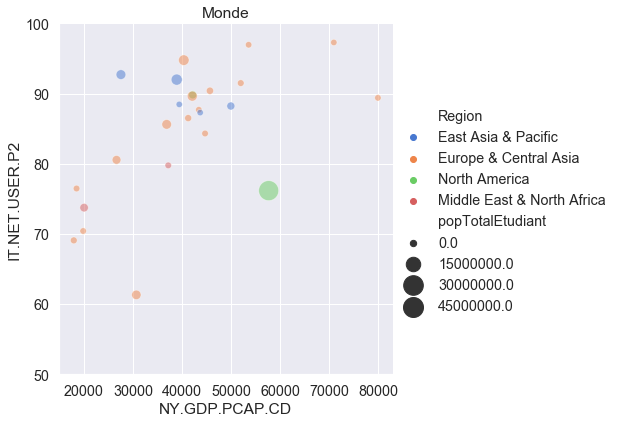

In [14]:
sns.set(font_scale=1.3)
rl = sns.relplot(
    x="NY.GDP.PCAP.CD", 
    y="IT.NET.USER.P2", 
    hue="Region", 
    size="popTotalEtudiant",
    sizes=(40,400),
    alpha=.5, 
    palette="muted",
    height=6, 
    data=dataPivot)
axes = rl.axes
axes[0,0].set_ylim(50,100)
axes[0,0].set_title('Monde')

<h4>Graphiques relplot (1 graphique par région)</h4>

<p>Définition des bornes minimum et maximum de chaque indicateur <br \>pour uniformiser les limites des axes de chaque graphique :</p>

In [15]:
# Définition des bornes min et max des différents indicateurs
maxIT = float(dataPivot.nlargest(1,'IT.NET.USER.P2')['IT.NET.USER.P2'])
minIT = float(dataPivot.nsmallest(1,'IT.NET.USER.P2')['IT.NET.USER.P2'])
maxPop = float(dataPivot.nlargest(1,'popTotalEtudiant')['popTotalEtudiant'])
minPop = float(dataPivot.nsmallest(1,'popTotalEtudiant')['popTotalEtudiant'])
maxGDP = float(dataPivot.nlargest(1,'NY.GDP.PCAP.CD')['NY.GDP.PCAP.CD'])
minGDP = float(dataPivot.nsmallest(1,'NY.GDP.PCAP.CD')['NY.GDP.PCAP.CD'])
minMaxIndic = np.array([[minIT,maxIT],[minPop,maxPop],[minGDP,maxGDP]])
# Pour que les valeurs min et max ne soient pas collés aux bords du graphique, 
# je soustrait/additionne 15% aux valeurs min/max  
minMaxIndicFix = np.copy(minMaxIndic)
minMaxIndicFix[:,0] *= 0.85
minMaxIndicFix[:,1] *= 1.15

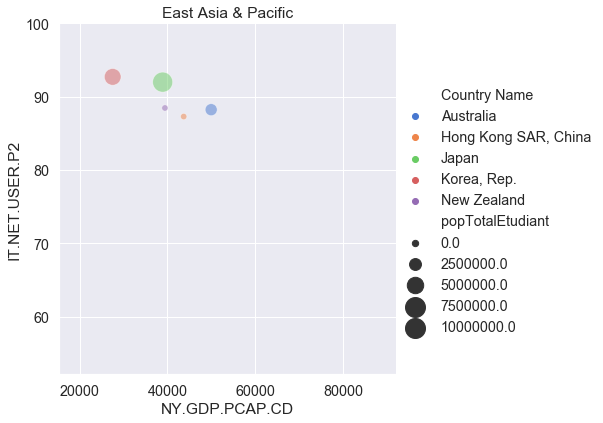

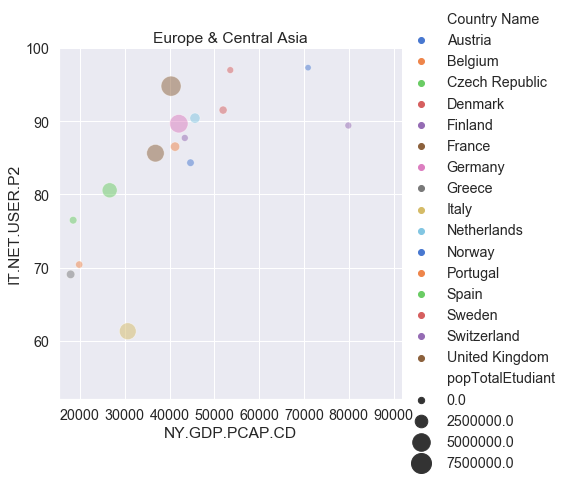

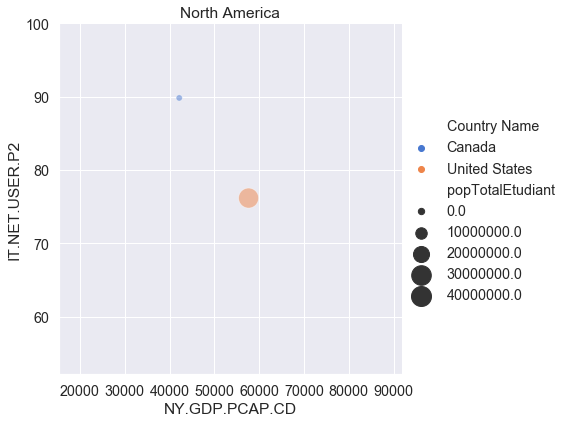

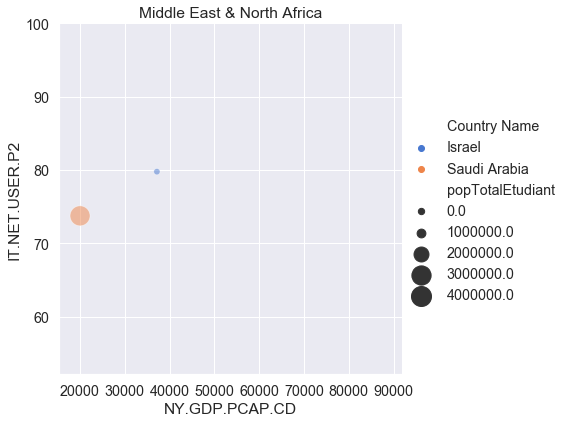

In [16]:
# Graphique representant la connectivité Internet des pays candidats 
# en fonction du PIB + Pop étudiante en grosseur de point
# 1 Graphique par Région
# Axe uniformisés (excepté pour la grosseur de point)

for region in dataPivot['Region'].unique():
    rl = sns.relplot(
        x="NY.GDP.PCAP.CD", 
        y="IT.NET.USER.P2", 
        hue="Country Name", 
        size="popTotalEtudiant",
        sizes=(40,400),
        alpha=.5, 
        palette="muted",
        height=6, 
        data=dataPivot[dataPivot['Region'] == region])
    axes = rl.axes
    axes[0,0].set_xlim(minMaxIndicFix[2][0],minMaxIndicFix[2][1])
    axes[0,0].set_ylim(minMaxIndicFix[0][0],100)
    axes[0,0].set_title(region)

<p>
    <ul>
        <li><u>3 pays</u> se dintinguent de la région '<b>East Asia Pacifique</b>'</li>
            <li>Un <u>groupement de plusieurs pays</u> se distinguent <br \>
                également de la région '<b>Europe & Central Asia</b>'</li>
        <li>Les <u>2 pays</u> de la région '<b>North América</b>' sont bien positionnés</li>
        <li>Les <u>2 pays</u> de la région '<b>Middle East & North Africa</b>' <br \>
            ne semble pas indiquer un fort potentiel</li>
    </ul>
</p>

<h3>Finalisation des valeurs minimales pour chaque indice et liste des pays sélectionnés</h3>

<p>Après analyse des graphiques et du DF '<b>dataPivot</b>' <br \>
    je sélectionne les <u>valeurs finales de mes indices</u> de cette manière:</p>
<p>
    <ol>
        <li>'IT.NET.USER.P2' >= <b>75</b></li>
        <li>'NY.GDP.PCAP.CD' >= <b>20 000</b></li>
        <li>'popTotalEtudiant' >= <b>750 000</b></li>
    </ol>
</p>

<p>Création d'un DF '<b>dataPivotFinal</b>' avec <br \>les valeurs d'indices sélectionnés ci-dessus :</p>

In [17]:
dataPivotFinal = dataPivot[(dataPivot['IT.NET.USER.P2'] >= 75)&
                           (dataPivot['NY.GDP.PCAP.CD'] >= 20000)&
                           (dataPivot['popTotalEtudiant'] >= 750000)].sort_values(by='popTotalEtudiant', ascending=False)

<p><u>Visualisation du DF '<b>dataPivotFinal</b>' présentant les 13 pays sélectionnés dans <br \>
    le cadre de notre projet,</u> classé en <u>ordre décroissant</u> selon l'indice '<b>popTotalEtudiant</b>' :</p>

In [18]:
dataPivotFinal

Indicator Code,Country Name,Region,IT.NET.USER.P2,NY.GDP.PCAP.CD,popTotalEtudiant
101,United States,North America,76.176737,57638.159088,3.126804e+07
48,Japan,East Asia & Pacific,92.000000,38900.569306,7.545380e+06
100,United Kingdom,Europe & Central Asia,94.775801,40341.408246,6.548014e+06
37,Germany,Europe & Central Asia,89.647101,42069.597987,5.557733e+06
51,"Korea, Rep.",East Asia & Pacific,92.716545,27538.806128,5.171956e+06
34,France,Europe & Central Asia,85.622200,36854.968280,4.987237e+06
90,Spain,Europe & Central Asia,80.561333,26639.740588,3.626504e+06
19,Canada,North America,89.840000,42157.927991,2.743554e+06
6,Australia,East Asia & Pacific,88.238658,49927.819509,2.557683e+06
69,Netherlands,Europe & Central Asia,90.410959,45669.814802,1.589016e+06


<p>Graphique <i>relplot</i> représentant, pour <u>les pays sélectionnés</u>, la <b>connectivité à Internet</b> <br \>en fonction du <b>PIB/Habitant</b> + <b>Population Etudiant</b> représentée en grosseur de point </p>

Text(0.5, 1.0, 'Monde')

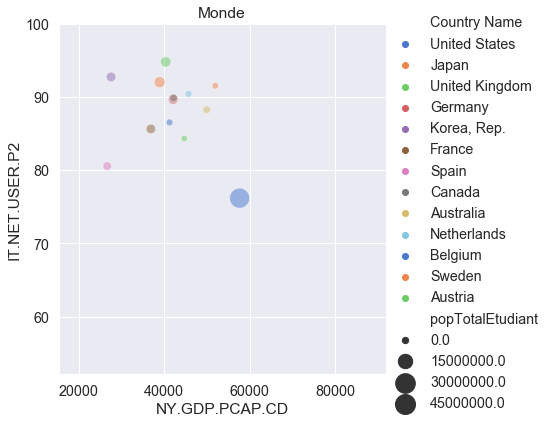

In [19]:
sns.set(font_scale=1.3)
rl = sns.relplot(
    x="NY.GDP.PCAP.CD", 
    y="IT.NET.USER.P2", 
    hue="Country Name", 
    size="popTotalEtudiant",
    sizes=(40,400),
    alpha=.5, 
    palette="muted",
    height=6, 
    data=dataPivotFinal)
axes = rl.axes
axes[0,0].set_xlim(minMaxIndicFix[2][0],minMaxIndicFix[2][1])
axes[0,0].set_ylim(minMaxIndicFix[0][0],100)
axes[0,0].set_title('Monde')

<p>Fin de l'analyse des <u>indicateurs passés</u> et de la <u>sélection des pays</u> <br \>du projet '<b>Analysez des données de systèmes éducatifs</b>'.</p>